""" PORTFOLIO OPTIMIZATION

What is the optimal weighting of each Sector ETF within the portfolio of 11 ETF’s 
that will provide the maximum return, at a given level of risk? How about minimum risk, given level of return? 

We will answer this question using the Efficient Frontier Portfolio Optimization method in Python.
--

In the first portion, we will gather and clean the data, as well as do some preliminay analysis on each sector ETF.

Part 1: Import the required libraries and dependencies.
Part 2: Pull data from Alpaca API into a DataFrame, check for NaN and zero values, then plot the results.

Part 3: Next, we get the percent change to calculate returns from the closing price dataframe and graph the results.

In the second portion, we will be calculating the Efficient Frontier of the portfolio of the 11 assets (Sector ETF's) and optimizing the portfolio, and then graphing the results. 

Part 4: Generating the Efficient Frontier. We will generate randomly weighted portfolios to plot and measure Sharpe ratios. We will take the sum of the mean returns generated by the stocks for 
an average trading year (252 days). Then, we will calculate the standard deviation of each portfolio. 

Part 5: Calculate returns, standard deviation, volatility, and sharpe ratio of the generated portfolios and display results.

Part 6: Same as Part 4, but instead of using randomly weighted portfolios, we will use the SciPy Optimize function.

Part 7: Calculate returns, standard deviation, volatility, and sharpe ratio of the generated portfolios and display results.

Part 8: Parse each Sector ETF data into its own dataframe.

Part 9: Only include timestamp and close price for each Sector ETF dataframe. 

Part 10: Provide a statistical summary of each individual Sector ETF Dataframe for the full length of the dataset.
Part 11: Line Plot each individual Sector ETF Dataframe for the full length of the dataset.
Part 12: Run a Monte Carlo Simulation to forecast the Optimal Portfolio.

In the third portion, we will add a novel asset class to the portfolio and analyze how the Efficient Frontier is
affected by the addition. How will the weights change of each Sector ETF when we add in the 20 year Treasury bond
to the portfolio (Ticker TLT)? 

We will explore this in the second file titled "Inflation Hedge"
--

"""

### Part 1: Import the required libraries and dependencies

In [438]:
# Import the required libraries and dependencies

import alpaca_trade_api as tradeapi
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.optimize as sco
from dotenv import load_dotenv
import os
import pandas as pd
import hvplot.pandas
import numpy as np
import warnings 
warnings.filterwarnings("ignore")
from MCForecastTools import MCSimulation
%matplotlib inline

### Part 2: Pull data from Alpaca API into a DataFrame, check for NaN and zero values, plot the results

In [409]:
# Print the ETF's by symbol

print("XLK, XLV, XLF, XLRE, XLE, XLB, XLC, XLY, XLP, XLI, XLU")

XLK, XLV, XLF, XLRE, XLE, XLB, XLC, XLY, XLP, XLI, XLU


In [410]:
# Set the variables for the Alpaca API and secret keys
load_dotenv("secret_code.env")

True

In [411]:
# Grab the Alpaca API Key
alpaca_api_key = os.environ.get('ALPACA_API_KEY')
alpaca_secret_key = os.environ.get('ALPACA_SECRET_KEY')

# Create the Alpaca tradeapi.REST object
alpaca = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version = "v2")

In [412]:
# Set the tickers for Technology - XLK, Health Care - XLV, Financials - XLF,
# Real Estate - XLRE, Energy - XLE, Materials - XLB, Communication - XLC, 
# Consumer Discretionary - XLY, Consumer Staples - XLP, 
# Industrials - XLI, Utilities - XLU

tickers = ['XLK', 'XLV', 'XLF', 'XLRE', 'XLE', 'XLB', 'XLC', 'XLY', 'XLP', 'XLI', 'XLU']

# Set timeframe to 1Day
timeframe = '1D'

# Format current date as ISO format
# Set both the start and end date at the date of your prior weekday 
# 9+1 to backtest data
start_date = pd.Timestamp("2013-05-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2023-05-01", tz="America/New_York").isoformat()

In [413]:
# Use the Alpaca get_bars function to get current closing prices the portfolio
# Be sure to set the `df` property after the function to format the response object as a DataFrame

portfolio_data = alpaca.get_bars(
    tickers, 
    timeframe,
    start = start_date,
    end = end_date).df

# portfolio_data

In [414]:
portfolio_data.head()

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2015-12-01 05:00:00+00:00,45.76,46.06,45.600,46.05,7717036,27667,45.921989,XLB
2015-12-02 05:00:00+00:00,45.91,46.02,45.280,45.43,8005887,24522,45.556902,XLB
2015-12-03 05:00:00+00:00,45.65,45.73,44.795,45.03,5828780,28059,45.184572,XLB
2015-12-04 05:00:00+00:00,45.13,45.94,44.990,45.82,5607746,27545,45.606292,XLB
2015-12-07 05:00:00+00:00,45.57,45.79,44.710,45.00,6163064,23783,44.993662,XLB


In [415]:
# Create the dataframe

df = pd.DataFrame()
for ticker in tickers:
    df[ticker] = pd.DataFrame(portfolio_data[portfolio_data['symbol'] == ticker]['close'])

In [416]:
df1 = pd.DataFrame(portfolio_data[portfolio_data['symbol'] == tickers[0]])
df2 = pd.DataFrame(portfolio_data[portfolio_data['symbol'] == tickers[1]])
df3 = pd.DataFrame(portfolio_data[portfolio_data['symbol'] == tickers[2]])
df4 = pd.DataFrame(portfolio_data[portfolio_data['symbol'] == tickers[3]])
df5 = pd.DataFrame(portfolio_data[portfolio_data['symbol'] == tickers[4]])
df6 = pd.DataFrame(portfolio_data[portfolio_data['symbol'] == tickers[5]])
df7 = pd.DataFrame(portfolio_data[portfolio_data['symbol'] == tickers[6]])
df8 = pd.DataFrame(portfolio_data[portfolio_data['symbol'] == tickers[7]])
df9 = pd.DataFrame(portfolio_data[portfolio_data['symbol'] == tickers[8]])
df10 = pd.DataFrame(portfolio_data[portfolio_data['symbol'] == tickers[9]])
df11 = pd.DataFrame(portfolio_data[portfolio_data['symbol'] == tickers[10]])
mc_df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11], axis = 1, keys = tickers)
mc_df

XLK                                       \
                             open      high      low   close    volume   
timestamp                                                                
2015-12-01 05:00:00+00:00   44.14   44.3600   44.045   44.35   7779488   
2015-12-02 05:00:00+00:00   44.40   44.5650   44.020   44.08   9697088   
2015-12-03 05:00:00+00:00   44.19   44.3200   43.290   43.50  11854265   
2015-12-04 05:00:00+00:00   43.63   44.6450   43.540   44.57  12840171   
2015-12-07 05:00:00+00:00   44.52   44.5577   44.140   44.35  12814944   
...                           ...       ...      ...     ...       ...   
2023-04-25 04:00:00+00:00  146.39  146.6700  143.920  143.97   5531437   
2023-04-26 04:00:00+00:00  146.50  147.6200  145.760  146.11   6801804   
2023-04-27 04:00:00+00:00  146.80  149.3150  146.440  149.21   6042384   
2023-04-28 04:00:00+00:00  149.21  150.8600  149.050  150.83   5123786   
2023-05-01 04:00:00+00:00  150.71  151.6475  150.470  150.92   4097311   

                                                             XLV            \
                          trade_count        vwap symbol    open      high   
timestamp                                                                    
2015-12-01 05:00:00+00:00       25116   44.230051    XLK   71.48   72.3700   
2015-12-02 05:00:00+00:00       28153   44.323713    XLK   72.39   72.6085   
2015-12-03 05:00:00+00:00       33797   43.723955    XLK   71.76   71.8500   
2015-12-04 05:00:00+00:00       35916   44.328743    XLK   70.44   71.8900   
2015-12-07 05:00:00+00:00       25604   44.332508    XLK   71.63   72.0000   
...                               ...         ...    ...     ...       ...   
2023-04-25 04:00:00+00:00       70095  145.058985    XLK  134.85  135.2600   
2023-04-26 04:00:00+00:00       79730  146.450357    XLK  132.43  132.5200   
2023-04-27 04:00:00+00:00       68503  148.193463    XLK  131.77  132.5850   
2023-04-28 04:00:00+00:00       71072  150.044518    XLK  132.24  133.9050   
2023-05-01 04:00:00+00:00       52256  151.053095    XLK  133.72  134.7550   

                           ...         XLI           XLU                   \
                           ...        vwap symbol   open    high      low   
timestamp                  ...                                              
2015-12-01 05:00:00+00:00  ...   54.891929    XLI  42.92  43.250  42.7500   
2015-12-02 05:00:00+00:00  ...   54.598700    XLI  42.99  43.100  42.1900   
2015-12-03 05:00:00+00:00  ...   53.975929    XLI  42.13  42.140  41.7400   
2015-12-04 05:00:00+00:00  ...   54.338047    XLI  42.03  42.530  41.9000   
2015-12-07 05:00:00+00:00  ...   54.281733    XLI  42.37  42.680  42.1701   
...                        ...         ...    ...    ...     ...      ...   
2023-04-25 04:00:00+00:00  ...   99.398208    XLI  69.71  70.280  69.6900   
2023-04-26 04:00:00+00:00  ...   97.683737    XLI  69.36  69.575  68.1800   
2023-04-27 04:00:00+00:00  ...   98.254845    XLI  68.46  69.140  68.4000   
2023-04-28 04:00:00+00:00  ...   99.803316    XLI  68.88  69.390  68.5500   
2023-05-01 04:00:00+00:00  ...  100.667073    XLI  68.82  69.770  68.7600   

                                                                          
                           close    volume trade_count       vwap symbol  
timestamp                                                                 
2015-12-01 05:00:00+00:00  43.16  12551543       44273  43.040413    XLU  
2015-12-02 05:00:00+00:00  42.20  12566056       43285  42.440103    XLU  
2015-12-03 05:00:00+00:00  41.88  14879220       60857  41.935748    XLU  
2015-12-04 05:00:00+00:00  42.47  10961473       43227  42.383786    XLU  
2015-12-07 05:00:00+00:00  42.66  13515101       39592  42.524453    XLU  
...                          ...       ...         ...        ...    ...  
2023-04-25 04:00:00+00:00  69.90  10251756       75343  69.958057    XLU  
2023-04-26 04:00:00+00:00  68.26  14757787      101436  68.600552    XL

In [417]:
# Display the dataframe

df

,XLK,XLV,XLF,XLRE,XLE,XLB,XLC,XLY,XLP,XLI,XLU
timestamp,,,,,,,,,,,
2015-12-01 05:00:00+00:00,44.35,72.31,24.83,31.2586,68.56,46.05,NaN,81.61,49.84,55.00,43.16
2015-12-02 05:00:00+00:00,44.08,71.70,24.54,30.6200,66.44,45.43,NaN,80.90,49.59,54.44,42.20
2015-12-03 05:00:00+00:00,43.50,70.13,24.14,30.0100,65.11,45.03,NaN,79.68,49.33,53.76,41.88
2015-12-04 05:00:00+00:00,44.57,71.78,24.78,30.6200,64.70,45.82,NaN,81.22,50.44,54.56,42.47
2015-12-07 05:00:00+00:00,44.35,71.38,24.55,30.6200,62.24,45.00,NaN,80.88,50.58,54.29,42.66
...,...,...,...,...,...,...,...,...,...,...,...
2023-04-25 04:00:00+00:00,143.97,133.61,32.57,36.7400,84.66,79.49,56.73,144.43,76.78,98.99,69.90
2023-04-26 04:00:00+00:00,146.11,131.71,32.26,36.4400,83.53,78.55,56.13,143.69,76.18,97.12,68.26
2023-04-27 04:00:00+00:00,149.21,132.40,32.78,37.3200,83.83,79.62,59.39,147.48,77.03,99.04,69.08


<AxesSubplot:xlabel='timestamp'>

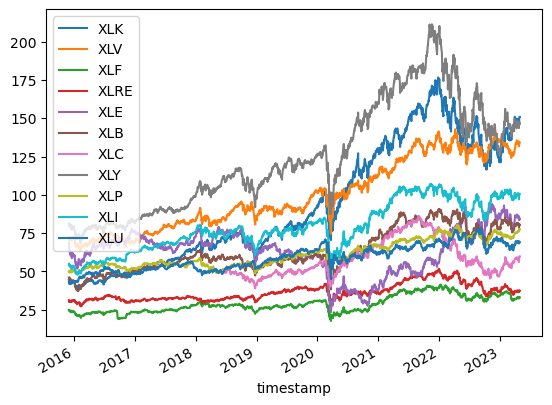

In [418]:
# Create a line plot for the new DataFrame for the full length of time in the dataset 
# tickers = ['XLK', 'XLV', 'XLF', 'XLRE', 'XLE', 'XLB', 'XLC', 'XLY', 'XLP','XLI', 'XLU']

df.plot()

In [419]:
# Use the hvplot function to create an interactive graph

df.hvplot(width = 1400, height = 600)

:NdOverlay   [Variable]
   :Curve   [timestamp]   (value)

In [420]:
# Check for zero values within the dataset portfolio_data

sum = 0
for i in portfolio_data.iloc[:,3]:
    if i == 0:
        sum = sum + 1 

print(sum)

0


### Part 3: Next, we get the percent change to calculate reteurns from the closing price dataframe and graph them

<AxesSubplot:xlabel='timestamp'>

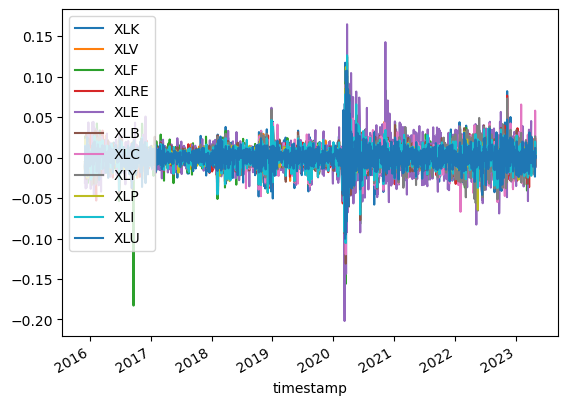

In [421]:
returns = df.pct_change()
returns.plot()

### Part 4: Generating the Efficient Frontier. 
##### We will generate randomly weighted portfolios to plot and measure Sharpe ratios. 
##### We will take the sum of the mean returns generated by the stocks for an average trading year (252 dats). 
###### Then, we will calculate the standard deviation of each portfolio. 

In [422]:
def portfolio_annualized_performance(weights, mean_returns, cov_matrix):
    returns = np.sum(mean_returns * weights) * 252
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)
    return std, returns


In [423]:
def random_portfolios(num_portfolios, mean_returns, cov_matrix, risk_free_rate):
    results = np.zeros((3, num_portfolios))
    n_assets = len(mean_returns)
    weights_record = []
    for i in range(num_portfolios):
        weights = np.random.random(n_assets)
        weights /= np.sum(weights)
        weights_record.append(weights)
        portfolio_std_dev, portfolio_return = portfolio_annualized_performance(weights, mean_returns, cov_matrix)
        results[0,i] = portfolio_std_dev
        results[1,i] = portfolio_return
        results[2,i] = (portfolio_return - risk_free_rate) / portfolio_std_dev
    return results, weights_record

In [424]:
# inputs for above variables
# NOTE: For the risk free rate, we are using the 10 year treasury yield at the time the data was pulled
# which is 3.44% 

returns = df.pct_change()
mean_returns = returns.mean()
cov_matrix = returns.cov()
num_portfolios = 50000
risk_free_rate = 0.0344

### Part 5: Calculate returns, st dev, volatility, and sharpe ratio of the generated portfolios and display results

In [425]:
def display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate):
    results, weights = random_portfolios(num_portfolios, mean_returns, cov_matrix, risk_free_rate)
    max_sharpe_idx = np.argmax(results[2])
    sdp, rp = results[0, max_sharpe_idx], results[1, max_sharpe_idx]
    max_sharpe_allocation = pd.DataFrame(weights[max_sharpe_idx], index=df.columns, columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i * 100, 2) for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T
    
    min_vol_idx = np.argmin(results[0])
    sdp_min, rp_min = results[0, min_vol_idx], results[1, min_vol_idx]
    min_vol_allocation = pd.DataFrame(weights[min_vol_idx], index=df.columns, columns=['allocation'])
    min_vol_allocation.allocation = [round(i * 100, 2) for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T
    
    print ("-" * 80)
    print("Maximum Sharpe Ratio Portfolio Allocation\n")
    print("Annualized Return:", round(rp, 2))
    print("Annualized Volatility:", round(sdp, 2))
    print("\n")
    print(max_sharpe_allocation)
    
    print ("-" * 80)
    print("Minimum Volatility Portfolio Allocation\n")
    print("Annualized Return:", round(rp_min, 2))
    print("Annualized Volatility:", round(sdp, 2))
    print("\n")
    print(min_vol_allocation)
    
    plt.figure(figsize=(10, 7))
    plt.scatter(results[0, :], results[1, :], c=results[2, :], cmap='YlGnBu', marker='o', s=10, alpha=0.3)
    plt.colorbar()
    plt.scatter(sdp, rp, marker='*', color='r', s=500, label='Maximum Sharpe Ratio')
    plt.title('Simulated Portfolio Optimization based on Efficient Frontier')
    plt.xlabel('annualized volatility')
    plt.ylabel('annualized returns')
    plt.legend(labelspacing=0.8)


--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualized Return: 0.12
Annualized Volatility: 0.18


              XLK    XLV   XLF  XLRE   XLE   XLB   XLC   XLY   XLP   XLI  \
allocation  31.04  22.46  5.87  6.88  8.02  0.35  1.96  4.31  5.87  1.26   

              XLU  
allocation  11.97  
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Annualized Return: 0.09
Annualized Volatility: 0.18


             XLK    XLV   XLF  XLRE   XLE   XLB   XLC   XLY    XLP   XLI  \
allocation  7.94  23.68  1.94   7.0  0.01  6.96  0.29  2.67  23.31  0.17   

              XLU  
allocation  26.04  


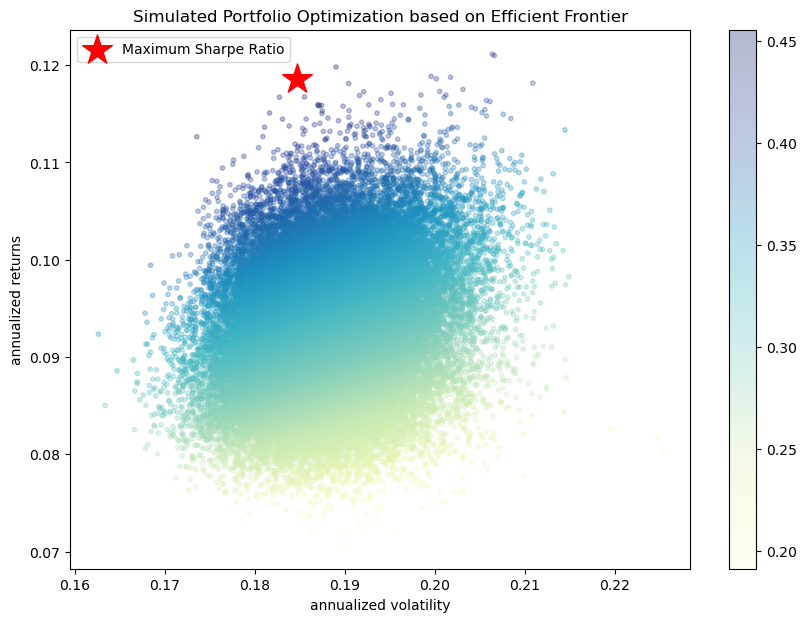

In [426]:
# To display frontier and data:
display_simulated_ef_with_random (mean_returns, cov_matrix, num_portfolios, risk_free_rate)

### Part 6: Generating the Efficient Frontier. 
##### We will generate randomly weighted portfolios to plot and measure Sharpe ratios. 
##### We will take the sum of the mean returns generated by the stocks for an average trading year (252 dats). 
##### Then, we will calculate the standard deviation of each portfolio. 

In [315]:
# We will now be using Scipy

def neg_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate):
    p_var, p_ret = portfolio_annualized_performance(weights, mean_returns, cov_matrix)
    return -(p_ret - risk_free_rate) / p_var

def max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix, risk_free_rate)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = (0.0,1.0)
    bounds = tuple(bound for asset in range(num_assets))
    result = sco.minimize(neg_sharpe_ratio, num_assets*[1./num_assets,], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints)
    return result

In [316]:
# We will now be using Scipy

def portfolio_volatility(weights, mean_returns, cov_matrix):
    return portfolio_annualized_performance(weights, mean_returns, cov_matrix)[0]

def min_variance(mean_returns, cov_matrix):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = (0.0,1.0)
    bounds = tuple(bound for asset in range(num_assets))

    result = sco.minimize(portfolio_volatility, num_assets*[1./num_assets,], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints)

    return result

In [317]:
# SciPy analysis - continued

def efficient_return(mean_returns, cov_matrix, target):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix)

    def portfolio_return(weights):
        return portfolio_annualized_performance(weights, mean_returns, cov_matrix)[1]

    constraints = ({'type': 'eq', 'fun': lambda x: portfolio_return(x) - target},
                   {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bounds = tuple((0,1) for asset in range(num_assets))
    result = sco.minimize(portfolio_volatility, num_assets*[1./num_assets,], args=args, method='SLSQP', bounds=bounds, constraints=constraints)
    return result


def efficient_frontier(mean_returns, cov_matrix, returns_range):
    efficients = []
    for ret in returns_range:
        efficients.append(efficient_return(mean_returns, cov_matrix, ret))
    return efficients

### Part 7: Calculate returns, st dev, volatility, and sharpe ratio of the generated portfolios and display results

In [318]:

# Using SciPy

def display_calculated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate):
    results, _ = random_portfolios(num_portfolios,mean_returns, cov_matrix, risk_free_rate)
    
    max_sharpe = max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate)
    sdp, rp = portfolio_annualized_performance(max_sharpe['x'], mean_returns, cov_matrix)
    max_sharpe_allocation = pd.DataFrame(max_sharpe.x,index=df.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T
    max_sharpe_allocation

    min_vol = min_variance(mean_returns, cov_matrix)
    sdp_min, rp_min = portfolio_annualized_performance(min_vol['x'], mean_returns, cov_matrix)
    min_vol_allocation = pd.DataFrame(min_vol.x,index=df.columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T
    
    print("-"*80)
    print("Maximum Sharpe Ratio Portfolio Allocation\n")
    print("Annualized Return:", round(rp,2))
    print("Annualized Volatility:", round(sdp,2))
    print("\n")
    print(max_sharpe_allocation)
    
    print("-"*80)
    print("Minimum Volatility Portfolio Allocation\n")
    print("Annualized Return:", round(rp_min,2))
    print("Annualized Volatility:", round(sdp_min,2))
    print("\n")
    print(min_vol_allocation)
    
    plt.figure(figsize=(10, 7))
    plt.scatter(results[0,:],results[1,:],c=results[2,:],cmap='YlGnBu', marker='o', s=10, alpha=0.3)
    plt.colorbar()
    plt.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio')
    plt.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Minimum volatility')

    target = np.linspace(rp_min, 0.32, 50)
    efficient_portfolios = efficient_frontier(mean_returns, cov_matrix, target)
    plt.plot([p['fun'] for p in efficient_portfolios], target, linestyle='-.', color='black', label='efficient frontier')
    plt.title('Calculated Portfolio Optimization based on Efficient Frontier')
    plt.xlabel('annualized volatility')
    plt.ylabel('annualized returns')
    plt.legend(labelspacing=0.8)


--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualized Return: 0.2
Annualized Volatility: 0.25


              XLK  XLV  XLF  XLRE  XLE  XLB  XLC  XLY  XLP  XLI  XLU
allocation  100.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Annualized Return: 0.08
Annualized Volatility: 0.15


            XLK    XLV  XLF  XLRE   XLE  XLB  XLC   XLY    XLP  XLI   XLU
allocation  0.0  31.69  0.0   0.0  0.09  0.0  0.0  2.03  57.57  0.0  8.62


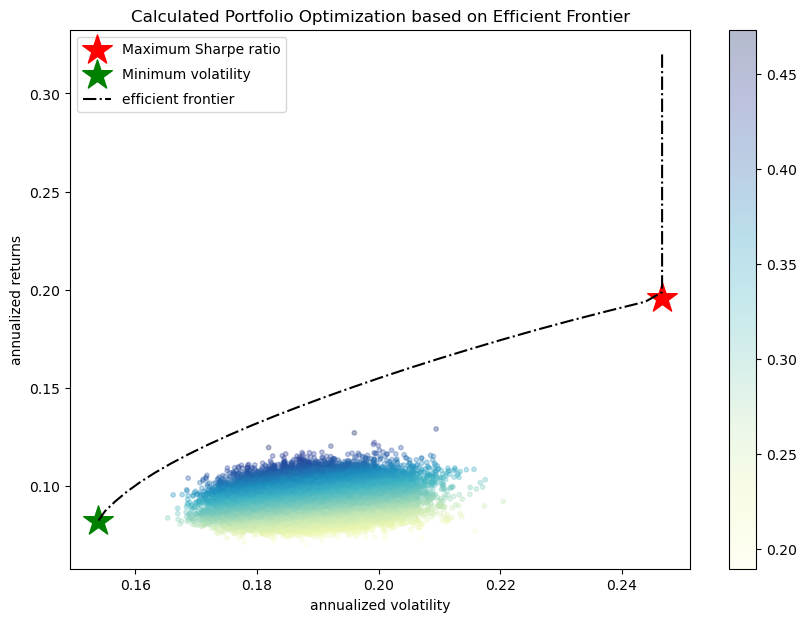

In [319]:
#Using SciPy

display_calculated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate)

In [320]:
# Part 8: Parse each Sector ETF data into its own dataframe

In [321]:
# Reorganize the DataFrame for XLK
# Separate ticker data
# tickers = ['XLK', 'XLV', 'XLF', 'XLRE', 'XLE', 'XLB', 'XLC', 'XLY', 'XLP', 'XLI', 'XLU']

XLK_data = portfolio_data[portfolio_data['symbol'] == 'XLK'].drop('symbol', axis=1)
XLK_data

,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,
2015-12-01 05:00:00+00:00,44.14,44.3600,44.045,44.35,7779488,25116,44.230051
2015-12-02 05:00:00+00:00,44.40,44.5650,44.020,44.08,9697088,28153,44.323713
2015-12-03 05:00:00+00:00,44.19,44.3200,43.290,43.50,11854265,33797,43.723955
2015-12-04 05:00:00+00:00,43.63,44.6450,43.540,44.57,12840171,35916,44.328743
2015-12-07 05:00:00+00:00,44.52,44.5577,44.140,44.35,12814944,25604,44.332508
...,...,...,...,...,...,...,...
2023-04-25 04:00:00+00:00,146.39,146.6700,143.920,143.97,5531437,70095,145.058985
2023-04-26 04:00:00+00:00,146.50,147.6200,145.760,146.11,6801804,79730,146.450357
2023-04-27 04:00:00+00:00,146.80,149.3150,146.440,149.21,6042384,68503,148.193463


In [322]:
# Reorganize the DataFrame for XLV
# Separate ticker data
# tickers = ['XLK', 'XLV', 'XLF', 'XLRE', 'XLE', 'XLB', 'XLC', 'XLY', 'XLP', 'XLI', 'XLU']

XLV_data = portfolio_data[portfolio_data['symbol'] == 'XLV'].drop('symbol', axis=1)
XLV_data

,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,
2015-12-01 05:00:00+00:00,71.48,72.3700,71.3171,72.31,10659529,53601,71.933507
2015-12-02 05:00:00+00:00,72.39,72.6085,71.5900,71.70,9875112,55788,71.985696
2015-12-03 05:00:00+00:00,71.76,71.8500,69.8200,70.13,13191350,65769,70.485965
2015-12-04 05:00:00+00:00,70.44,71.8900,70.2720,71.78,14929777,69939,71.380796
2015-12-07 05:00:00+00:00,71.63,72.0000,71.0100,71.38,8511194,45458,71.346525
...,...,...,...,...,...,...,...
2023-04-25 04:00:00+00:00,134.85,135.2600,133.4200,133.61,7752049,71716,134.205579
2023-04-26 04:00:00+00:00,132.43,132.5200,130.9200,131.71,10128825,88575,131.652697
2023-04-27 04:00:00+00:00,131.77,132.5850,130.6200,132.40,10008925,87182,131.662831


In [323]:
# Reorganize the DataFrame for XLV
# Separate ticker data
# tickers = ['XLK', 'XLV', 'XLF', 'XLRE', 'XLE', 'XLB', 'XLC', 'XLY', 'XLP', 'XLI', 'XLU']

XLF_data = portfolio_data[portfolio_data['symbol'] == 'XLF'].drop('symbol', axis=1)
XLF_data

,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,
2015-12-01 05:00:00+00:00,24.65,24.8400,24.600,24.83,31087166,39743,24.717556
2015-12-02 05:00:00+00:00,24.89,24.8900,24.490,24.54,35618658,47903,24.677192
2015-12-03 05:00:00+00:00,24.68,24.6800,24.060,24.14,48179183,59336,24.285806
2015-12-04 05:00:00+00:00,24.29,24.8200,24.225,24.78,42686845,61492,24.616355
2015-12-07 05:00:00+00:00,24.76,24.7700,24.433,24.55,25492411,40372,24.558467
...,...,...,...,...,...,...,...
2023-04-25 04:00:00+00:00,32.93,32.9900,32.560,32.57,58534695,96099,32.724781
2023-04-26 04:00:00+00:00,32.48,32.6600,32.120,32.26,54294597,94784,32.333898
2023-04-27 04:00:00+00:00,32.38,32.8400,32.380,32.78,46398842,90007,32.649997


In [324]:
# Reorganize the DataFrame for XLF
# Separate ticker data
# tickers = ['XLK', 'XLV', 'XLF', 'XLRE', 'XLE', 'XLB', 'XLC', 'XLY', 'XLP', 'XLI', 'XLU']

XLRE_data = portfolio_data[portfolio_data['symbol'] == 'XLRE'].drop('symbol', axis=1)
XLRE_data

,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,
2015-12-01 05:00:00+00:00,30.98,31.2586,30.980,31.2586,5557,35,31.085091
2015-12-02 05:00:00+00:00,31.11,31.2200,30.620,30.6200,4397,27,30.948158
2015-12-03 05:00:00+00:00,30.37,30.3700,30.010,30.0100,776,7,30.155751
2015-12-04 05:00:00+00:00,30.31,30.8300,30.310,30.6200,4378,22,30.703560
2015-12-07 05:00:00+00:00,30.62,30.6200,30.620,30.6200,0,0,0.000000
...,...,...,...,...,...,...,...
2023-04-25 04:00:00+00:00,36.87,37.0400,36.720,36.7400,3664353,20378,36.854772
2023-04-26 04:00:00+00:00,36.65,37.0100,36.340,36.4400,4446325,26622,36.651611
2023-04-27 04:00:00+00:00,36.54,37.4050,36.540,37.3200,4278753,26225,37.085132


In [325]:
# Reorganize the DataFrame for XLE
# Separate ticker data
# tickers = ['XLK', 'XLV', 'XLF', 'XLRE', 'XLE', 'XLB', 'XLC', 'XLY', 'XLP', 'XLI', 'XLU']

XLE_data = portfolio_data[portfolio_data['symbol'] == 'XLE'].drop('symbol', axis=1)
XLE_data

,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,
2015-12-01 05:00:00+00:00,68.08,68.620,67.9100,68.56,13797038,67795,68.280049
2015-12-02 05:00:00+00:00,68.11,68.370,66.2200,66.44,25428080,132209,67.163013
2015-12-03 05:00:00+00:00,66.76,66.980,64.7900,65.11,24219152,141786,65.678543
2015-12-04 05:00:00+00:00,64.50,65.085,63.4800,64.70,32839278,173452,64.338207
2015-12-07 05:00:00+00:00,63.10,63.190,61.3500,62.24,32800384,165982,62.070845
...,...,...,...,...,...,...,...
2023-04-25 04:00:00+00:00,85.44,85.590,84.1600,84.66,15332847,133311,84.651058
2023-04-26 04:00:00+00:00,84.06,84.840,83.0200,83.53,20035092,164481,83.863145
2023-04-27 04:00:00+00:00,83.48,84.040,82.6900,83.83,17057343,143292,83.465898


In [326]:
# Reorganize the DataFrame for XLB
# Separate ticker data
# tickers = ['XLK', 'XLV', 'XLF', 'XLRE', 'XLE', 'XLB', 'XLC', 'XLY', 'XLP', 'XLI', 'XLU']

XLB_data = portfolio_data[portfolio_data['symbol'] == 'XLB'].drop('symbol', axis=1)
XLB_data

,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,
2015-12-01 05:00:00+00:00,45.76,46.060,45.600,46.05,7717036,27667,45.921989
2015-12-02 05:00:00+00:00,45.91,46.020,45.280,45.43,8005887,24522,45.556902
2015-12-03 05:00:00+00:00,45.65,45.730,44.795,45.03,5828780,28059,45.184572
2015-12-04 05:00:00+00:00,45.13,45.940,44.990,45.82,5607746,27545,45.606292
2015-12-07 05:00:00+00:00,45.57,45.790,44.710,45.00,6163064,23783,44.993662
...,...,...,...,...,...,...,...
2023-04-25 04:00:00+00:00,80.40,80.480,79.450,79.49,5983198,51413,79.796496
2023-04-26 04:00:00+00:00,79.17,79.435,78.285,78.55,5955223,51619,78.830033
2023-04-27 04:00:00+00:00,78.78,79.650,78.325,79.62,5913180,49540,79.024982


In [327]:
# Reorganize the DataFrame for XLC
# Separate ticker data
# tickers = ['XLK', 'XLV', 'XLF', 'XLRE', 'XLE', 'XLB', 'XLC', 'XLY', 'XLP', 'XLI', 'XLU']

XLC_data = portfolio_data[portfolio_data['symbol'] == 'XLC'].drop('symbol', axis=1)
XLC_data

,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,
2018-06-19 04:00:00+00:00,49.70,50.060,49.580,49.96,16588,66,49.816014
2018-06-20 04:00:00+00:00,50.45,50.889,50.450,50.58,189989,912,50.682223
2018-06-21 04:00:00+00:00,50.77,50.850,50.200,50.27,428740,604,50.456106
2018-06-22 04:00:00+00:00,50.59,50.610,50.190,50.49,181638,389,50.467921
2018-06-25 04:00:00+00:00,50.23,50.230,49.015,49.45,2509603,1488,49.214474
...,...,...,...,...,...,...,...
2023-04-25 04:00:00+00:00,57.36,57.460,56.720,56.73,5345938,32754,57.024743
2023-04-26 04:00:00+00:00,56.75,57.110,56.065,56.13,6964756,40709,56.481015
2023-04-27 04:00:00+00:00,58.24,59.570,58.100,59.39,9597483,49983,59.132861


In [328]:
# Reorganize the DataFrame for XLY
# Separate ticker data
# tickers = ['XLK', 'XLV', 'XLF', 'XLRE', 'XLE', 'XLB', 'XLC', 'XLY', 'XLP', 'XLI', 'XLU']

XLY_data = portfolio_data[portfolio_data['symbol'] == 'XLY'].drop('symbol', axis=1)
XLY_data

,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,
2015-12-01 05:00:00+00:00,81.22,81.6400,80.985,81.61,8187446,44148,81.396035
2015-12-02 05:00:00+00:00,81.73,81.7500,80.740,80.90,6263477,38760,81.183407
2015-12-03 05:00:00+00:00,81.24,81.2400,79.330,79.68,9828903,58541,80.089175
2015-12-04 05:00:00+00:00,79.97,81.3200,79.780,81.22,7032182,44109,80.822906
2015-12-07 05:00:00+00:00,81.10,81.2499,80.320,80.88,6535419,37396,80.740029
...,...,...,...,...,...,...,...
2023-04-25 04:00:00+00:00,146.38,146.6400,144.410,144.43,4247259,50960,145.258770
2023-04-26 04:00:00+00:00,145.16,145.6300,143.400,143.69,3853004,49809,144.516404
2023-04-27 04:00:00+00:00,144.70,147.6500,144.600,147.48,4815387,68454,146.631320


In [329]:
# Reorganize the DataFrame for XLP
# Separate ticker data
# tickers = ['XLK', 'XLV', 'XLF', 'XLRE', 'XLE', 'XLB', 'XLC', 'XLY', 'XLP', 'XLI', 'XLU']

XLP_data = portfolio_data[portfolio_data['symbol'] == 'XLP'].drop('symbol', axis=1)
XLP_data

,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,
2015-12-01 05:00:00+00:00,49.52,49.8700,49.520,49.84,10807852,23119,49.776266
2015-12-02 05:00:00+00:00,49.77,49.9100,49.520,49.59,7832017,23528,49.718725
2015-12-03 05:00:00+00:00,49.77,49.9500,49.140,49.33,12556022,34239,49.431362
2015-12-04 05:00:00+00:00,49.46,50.4800,49.260,50.44,12783219,37652,50.231542
2015-12-07 05:00:00+00:00,50.63,50.7400,50.380,50.58,9022022,27883,50.548680
...,...,...,...,...,...,...,...
2023-04-25 04:00:00+00:00,76.86,77.3700,76.695,76.78,12180191,68021,76.989457
2023-04-26 04:00:00+00:00,76.42,76.7150,76.140,76.18,8779519,53954,76.411361
2023-04-27 04:00:00+00:00,76.22,77.1054,76.170,77.03,11287817,66708,76.748504


In [330]:
# Reorganize the DataFrame for XLF
# Separate ticker data
# tickers = ['XLK', 'XLV', 'XLF', 'XLRE', 'XLE', 'XLB', 'XLC', 'XLY', 'XLP', 'XLI', 'XLU']

XLI_data = portfolio_data[portfolio_data['symbol'] == 'XLI'].drop('symbol', axis=1)
XLI_data

,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,
2015-12-01 05:00:00+00:00,54.76,55.175,54.6900,55.00,11475851,38487,54.891929
2015-12-02 05:00:00+00:00,54.91,55.060,54.3250,54.44,13131576,38293,54.598700
2015-12-03 05:00:00+00:00,54.58,54.610,53.5601,53.76,16001355,60179,53.975929
2015-12-04 05:00:00+00:00,53.84,54.570,53.7200,54.56,13891933,53684,54.338047
2015-12-07 05:00:00+00:00,54.39,54.565,54.1000,54.29,9665464,36876,54.281733
...,...,...,...,...,...,...,...
2023-04-25 04:00:00+00:00,100.25,100.290,98.9200,98.99,12306937,92127,99.398208
2023-04-26 04:00:00+00:00,98.35,98.610,96.9200,97.12,16058847,116986,97.683737
2023-04-27 04:00:00+00:00,97.41,99.155,97.2600,99.04,14421565,103637,98.254845


In [331]:
# Reorganize the DataFrame for XLU
# Separate ticker data
# tickers = ['XLK', 'XLV', 'XLF', 'XLRE', 'XLE', 'XLB', 'XLC', 'XLY', 'XLP', 'XLI', 'XLU']

XLU_data = portfolio_data[portfolio_data['symbol'] == 'XLU'].drop('symbol', axis=1)
XLU_data

,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,
2015-12-01 05:00:00+00:00,42.92,43.250,42.7500,43.16,12551543,44273,43.040413
2015-12-02 05:00:00+00:00,42.99,43.100,42.1900,42.20,12566056,43285,42.440103
2015-12-03 05:00:00+00:00,42.13,42.140,41.7400,41.88,14879220,60857,41.935748
2015-12-04 05:00:00+00:00,42.03,42.530,41.9000,42.47,10961473,43227,42.383786
2015-12-07 05:00:00+00:00,42.37,42.680,42.1701,42.66,13515101,39592,42.524453
...,...,...,...,...,...,...,...
2023-04-25 04:00:00+00:00,69.71,70.280,69.6900,69.90,10251756,75343,69.958057
2023-04-26 04:00:00+00:00,69.36,69.575,68.1800,68.26,14757787,101436,68.600552
2023-04-27 04:00:00+00:00,68.46,69.140,68.4000,69.08,12466677,87745,68.841671


In [332]:
#Check for N/A values within each ETF dataframe
# tickers = ['XLK', 'XLV', 'XLF', 'XLRE', 'XLE', 'XLB', 'XLC', 'XLY', 'XLP', 'XLI', 'XLU']

display(XLK_data.isna().sum())
display(XLV_data.isna().sum())
display(XLF_data.isna().sum())
display(XLRE_data.isna().sum())
display(XLE_data.isna().sum())
display(XLB_data.isna().sum())
display(XLC_data.isna().sum())
display(XLY_data.isna().sum())
display(XLP_data.isna().sum())
display(XLI_data.isna().sum())
display(XLU_data.isna().sum())

open           0
high           0
low            0
close          0
volume         0
trade_count    0
vwap           0
dtype: int64

open           0
high           0
low            0
close          0
volume         0
trade_count    0
vwap           0
dtype: int64

open           0
high           0
low            0
close          0
volume         0
trade_count    0
vwap           0
dtype: int64

open           0
high           0
low            0
close          0
volume         0
trade_count    0
vwap           0
dtype: int64

open           0
high           0
low            0
close          0
volume         0
trade_count    0
vwap           0
dtype: int64

open           0
high           0
low            0
close          0
volume         0
trade_count    0
vwap           0
dtype: int64

open           0
high           0
low            0
close          0
volume         0
trade_count    0
vwap           0
dtype: int64

open           0
high           0
low            0
close          0
volume         0
trade_count    0
vwap           0
dtype: int64

open           0
high           0
low            0
close          0
volume         0
trade_count    0
vwap           0
dtype: int64

open           0
high           0
low            0
close          0
volume         0
trade_count    0
vwap           0
dtype: int64

open           0
high           0
low            0
close          0
volume         0
trade_count    0
vwap           0
dtype: int64

### Part 9: Only include timestamp and close price for each Sector ETF dataframe. 

In [333]:
# Break up each Sector ETF dataframe to only include timestamp and close below
# tickers = ['XLK', 'XLV', 'XLF', 'XLRE', 'XLE', 'XLB', 'XLC', 'XLY', 'XLP', 'XLI', 'XLU']

In [334]:
# For XLK

XLK_close = XLK_data.iloc[:,3]
XLK_close

timestamp
2015-12-01 05:00:00+00:00     44.35
2015-12-02 05:00:00+00:00     44.08
2015-12-03 05:00:00+00:00     43.50
2015-12-04 05:00:00+00:00     44.57
2015-12-07 05:00:00+00:00     44.35
                              ...  
2023-04-25 04:00:00+00:00    143.97
2023-04-26 04:00:00+00:00    146.11
2023-04-27 04:00:00+00:00    149.21
2023-04-28 04:00:00+00:00    150.83
2023-05-01 04:00:00+00:00    150.92
Name: close, Length: 1866, dtype: float64

In [335]:
# For XLV

XLV_close = XLV_data.iloc[:,3]
XLV_close

timestamp
2015-12-01 05:00:00+00:00     72.31
2015-12-02 05:00:00+00:00     71.70
2015-12-03 05:00:00+00:00     70.13
2015-12-04 05:00:00+00:00     71.78
2015-12-07 05:00:00+00:00     71.38
                              ...  
2023-04-25 04:00:00+00:00    133.61
2023-04-26 04:00:00+00:00    131.71
2023-04-27 04:00:00+00:00    132.40
2023-04-28 04:00:00+00:00    133.53
2023-05-01 04:00:00+00:00    134.22
Name: close, Length: 1866, dtype: float64

In [336]:
# For XLF

XLF_close = XLF_data.iloc[:,3]
XLF_close

timestamp
2015-12-01 05:00:00+00:00    24.83
2015-12-02 05:00:00+00:00    24.54
2015-12-03 05:00:00+00:00    24.14
2015-12-04 05:00:00+00:00    24.78
2015-12-07 05:00:00+00:00    24.55
                             ...  
2023-04-25 04:00:00+00:00    32.57
2023-04-26 04:00:00+00:00    32.26
2023-04-27 04:00:00+00:00    32.78
2023-04-28 04:00:00+00:00    33.17
2023-05-01 04:00:00+00:00    33.08
Name: close, Length: 1866, dtype: float64

In [337]:
# For XLRE

XLRE_close = XLRE_data.iloc[:,3]
XLRE_close

timestamp
2015-12-01 05:00:00+00:00    31.2586
2015-12-02 05:00:00+00:00    30.6200
2015-12-03 05:00:00+00:00    30.0100
2015-12-04 05:00:00+00:00    30.6200
2015-12-07 05:00:00+00:00    30.6200
                              ...   
2023-04-25 04:00:00+00:00    36.7400
2023-04-26 04:00:00+00:00    36.4400
2023-04-27 04:00:00+00:00    37.3200
2023-04-28 04:00:00+00:00    37.7500
2023-05-01 04:00:00+00:00    37.4000
Name: close, Length: 1866, dtype: float64

In [338]:
# For XLE

XLE_close = XLE_data.iloc[:,3]
XLE_close

timestamp
2015-12-01 05:00:00+00:00    68.56
2015-12-02 05:00:00+00:00    66.44
2015-12-03 05:00:00+00:00    65.11
2015-12-04 05:00:00+00:00    64.70
2015-12-07 05:00:00+00:00    62.24
                             ...  
2023-04-25 04:00:00+00:00    84.66
2023-04-26 04:00:00+00:00    83.53
2023-04-27 04:00:00+00:00    83.83
2023-04-28 04:00:00+00:00    85.13
2023-05-01 04:00:00+00:00    84.17
Name: close, Length: 1866, dtype: float64

In [339]:
# For XLB

XLB_close = XLB_data.iloc[:,3]
XLB_close

timestamp
2015-12-01 05:00:00+00:00    46.05
2015-12-02 05:00:00+00:00    45.43
2015-12-03 05:00:00+00:00    45.03
2015-12-04 05:00:00+00:00    45.82
2015-12-07 05:00:00+00:00    45.00
                             ...  
2023-04-25 04:00:00+00:00    79.49
2023-04-26 04:00:00+00:00    78.55
2023-04-27 04:00:00+00:00    79.62
2023-04-28 04:00:00+00:00    80.55
2023-05-01 04:00:00+00:00    80.51
Name: close, Length: 1866, dtype: float64

In [340]:
# For XLC

XLC_close = XLC_data.iloc[:,3]
XLC_close

timestamp
2018-06-19 04:00:00+00:00    49.96
2018-06-20 04:00:00+00:00    50.58
2018-06-21 04:00:00+00:00    50.27
2018-06-22 04:00:00+00:00    50.49
2018-06-25 04:00:00+00:00    49.45
                             ...  
2023-04-25 04:00:00+00:00    56.73
2023-04-26 04:00:00+00:00    56.13
2023-04-27 04:00:00+00:00    59.39
2023-04-28 04:00:00+00:00    59.90
2023-05-01 04:00:00+00:00    59.89
Name: close, Length: 1225, dtype: float64

In [341]:
# For XLY

XLY_close = XLY_data.iloc[:,3]
XLY_close

timestamp
2015-12-01 05:00:00+00:00     81.61
2015-12-02 05:00:00+00:00     80.90
2015-12-03 05:00:00+00:00     79.68
2015-12-04 05:00:00+00:00     81.22
2015-12-07 05:00:00+00:00     80.88
                              ...  
2023-04-25 04:00:00+00:00    144.43
2023-04-26 04:00:00+00:00    143.69
2023-04-27 04:00:00+00:00    147.48
2023-04-28 04:00:00+00:00    147.86
2023-05-01 04:00:00+00:00    146.40
Name: close, Length: 1866, dtype: float64

In [342]:
# For XLP

XLP_close = XLP_data.iloc[:,3]
XLP_close

timestamp
2015-12-01 05:00:00+00:00    49.84
2015-12-02 05:00:00+00:00    49.59
2015-12-03 05:00:00+00:00    49.33
2015-12-04 05:00:00+00:00    50.44
2015-12-07 05:00:00+00:00    50.58
                             ...  
2023-04-25 04:00:00+00:00    76.78
2023-04-26 04:00:00+00:00    76.18
2023-04-27 04:00:00+00:00    77.03
2023-04-28 04:00:00+00:00    77.44
2023-05-01 04:00:00+00:00    77.50
Name: close, Length: 1866, dtype: float64

In [343]:
# For XLF

XLF_close = XLF_data.iloc[:,3]
XLF_close

timestamp
2015-12-01 05:00:00+00:00    24.83
2015-12-02 05:00:00+00:00    24.54
2015-12-03 05:00:00+00:00    24.14
2015-12-04 05:00:00+00:00    24.78
2015-12-07 05:00:00+00:00    24.55
                             ...  
2023-04-25 04:00:00+00:00    32.57
2023-04-26 04:00:00+00:00    32.26
2023-04-27 04:00:00+00:00    32.78
2023-04-28 04:00:00+00:00    33.17
2023-05-01 04:00:00+00:00    33.08
Name: close, Length: 1866, dtype: float64

In [344]:
# For XLI

XLI_close = XLI_data.iloc[:,3]
XLI_close

timestamp
2015-12-01 05:00:00+00:00     55.00
2015-12-02 05:00:00+00:00     54.44
2015-12-03 05:00:00+00:00     53.76
2015-12-04 05:00:00+00:00     54.56
2015-12-07 05:00:00+00:00     54.29
                              ...  
2023-04-25 04:00:00+00:00     98.99
2023-04-26 04:00:00+00:00     97.12
2023-04-27 04:00:00+00:00     99.04
2023-04-28 04:00:00+00:00    100.00
2023-05-01 04:00:00+00:00    100.54
Name: close, Length: 1866, dtype: float64

In [345]:
# For XLU

XLU_close = XLU_data.iloc[:,3]
XLU_close

timestamp
2015-12-01 05:00:00+00:00    43.16
2015-12-02 05:00:00+00:00    42.20
2015-12-03 05:00:00+00:00    41.88
2015-12-04 05:00:00+00:00    42.47
2015-12-07 05:00:00+00:00    42.66
                             ...  
2023-04-25 04:00:00+00:00    69.90
2023-04-26 04:00:00+00:00    68.26
2023-04-27 04:00:00+00:00    69.08
2023-04-28 04:00:00+00:00    68.98
2023-05-01 04:00:00+00:00    69.10
Name: close, Length: 1866, dtype: float64

In [346]:
# Part 10: Provide a statistical summary of each individual Sector ETF Dataframe for the full length of the dataset 
# tickers = ['XLK', 'XLV', 'XLF', 'XLRE', 'XLE', 'XLB', 'XLC', 'XLY', 'XLP', 'XLI', 'XLU']

In [347]:
# Statistical Summary for each of the dataframes with closing price
# XLK
XLK_close.describe()

count    1866.000000
mean       93.216434
std        39.264918
min        38.730000
25%        59.300000
50%        79.365000
75%       131.257500
max       176.650000
Name: close, dtype: float64

In [348]:
# Statistical Summary for each of the dataframes with closing price
# XLV
XLV_close.describe()

count    1866.000000
mean       99.282156
std        22.718661
min        63.520000
25%        81.202500
50%        92.210000
75%       123.562500
max       142.830000
Name: close, dtype: float64

In [349]:
# Statistical Summary for each of the dataframes with closing price
# XLF
XLF_close.describe()

count    1866.000000
mean       28.645178
std         5.418375
min        17.650000
25%        24.232500
50%        27.470000
75%        32.905000
max        41.420000
Name: close, dtype: float64

In [350]:
# Statistical Summary for each of the dataframes with closing price
# XLRE
XLRE_close.describe()

count    1866.000000
mean       36.410522
std         5.360712
min        25.460000
25%        32.141250
50%        35.280000
75%        39.170000
max        51.810000
Name: close, dtype: float64

In [351]:
# Statistical Summary for each of the dataframes with closing price
# XLB
XLB_close.describe()

count    1866.000000
mean       63.128213
std        13.672098
min        37.280000
25%        53.105000
50%        58.890000
75%        76.445000
max        90.610000
Name: close, dtype: float64

In [352]:
# Statistical Summary for each of the dataframes with closing price
# XLC
XLC_close.describe()

count    1225.000000
mean       58.676786
std        11.893688
min        38.970000
25%        49.360000
50%        55.030000
75%        67.280000
max        86.050000
Name: close, dtype: float64

In [353]:
# Statistical Summary for each of the dataframes with closing price
# XLY
XLY_close.describe()

count    1866.000000
mean      124.056037
std        35.471113
min        68.530000
25%        91.300000
50%       117.530000
75%       150.080000
max       211.420000
Name: close, dtype: float64

In [354]:
# Statistical Summary for each of the dataframes with closing price
# XLP
XLP_close.describe()

count    1866.000000
mean       61.188241
std         8.558771
min        48.270000
25%        54.065000
50%        58.308750
75%        69.740000
max        80.570000
Name: close, dtype: float64

In [355]:
# Statistical Summary for each of the dataframes with closing price
# XLI
XLI_close.describe()

count    1866.000000
mean       78.742924
std        15.636619
min        48.010000
25%        67.682500
50%        76.295000
75%        92.930000
max       107.120000
Name: close, dtype: float64

In [356]:
# Statistical Summary for each of the dataframes with closing price
# XLU
XLU_close.describe()

count    1866.000000
mean       58.869167
std         8.209902
min        41.790000
25%        51.752500
50%        58.485000
75%        65.600000
max        78.120000
Name: close, dtype: float64

### Part 11: Line Plot each individual Sector ETF Dataframe for the full length of the dataset
##### tickers = ['XLK', 'XLV', 'XLF', 'XLRE', 'XLE', 'XLB', 'XLC', 'XLY', 'XLP', 'XLI', 'XLU']

In [357]:
df.hvplot(subplots=True, width=500, height=400, by='symbol', color = 'red', grid=True).cols(3)

:NdLayout   [Variable]
   :Curve   [timestamp]   (value)

### Part 12: Monte Carlo Simulation of the 11 Sector ETFs. 

The Monte Carlo simulation will be used to help with future forcasting by modelingthe effects of uncertainty over time. This will further help predict the outcomes across the desired sectors that we are analyzing in our Efficient Frontier Portfolio. 

In [358]:
# Print the documentation of the MCSimulation module of the MCForecastTools library 
?MCSimulation 

Init signature:
MCSimulation(
    portfolio_data,
    weights='',
    num_simulation=1000,
    num_trading_days=252,
)
Docstring:     
A Python class for running Monte Carlo simulation on portfolio price data.

...

Attributes
----------
portfolio_data : pandas.DataFrame
    portfolio dataframe
weights: list(float)
    portfolio investment breakdown
nSim: int
    number of samples in simulation
nTrading: int
    number of trading days to simulate
simulated_return : pandas.DataFrame
    Simulated data from Monte Carlo
confidence_interval : pandas.Series
    the 95% confidence intervals for simulated final cumulative returns
Init docstring:
Constructs all the necessary attributes for the MCSimulation object.

Parameters
----------
portfolio_data: pandas.DataFrame
    DataFrame containing stock price information from Alpaca API
weights: list(float)
    A list fractions representing percentage of total investment per stock. DEFAULT: Equal distribution
num_simulation: int
    Number of simu

#### Part 15(a) Maximum Sharpe Ratio Portfolio

In [359]:
# Configure a Monte Carlo simulation to forecast five years cumulative returns 
MC_max_sharpe = MCSimulation(
    portfolio_data = mc_df,
    weights = [0.3629, 0.1058, 0.0242, 0.0181, 0.0147, 0.0918, 0.06, 0.0092, 0.042, 0.1167, 0.1546],
    num_simulation = 500,
    num_trading_days = 252*5
)

# Print the simulation input data 
MC_max_sharpe.portfolio_data.head()

XLK                                    \
                            open     high     low  close    volume   
timestamp                                                            
2015-12-01 05:00:00+00:00  44.14  44.3600  44.045  44.35   7779488   
2015-12-02 05:00:00+00:00  44.40  44.5650  44.020  44.08   9697088   
2015-12-03 05:00:00+00:00  44.19  44.3200  43.290  43.50  11854265   
2015-12-04 05:00:00+00:00  43.63  44.6450  43.540  44.57  12840171   
2015-12-07 05:00:00+00:00  44.52  44.5577  44.140  44.35  12814944   

                                                                        XLV  \
                          trade_count       vwap symbol daily_return   open   
timestamp                                                                     
2015-12-01 05:00:00+00:00       25116  44.230051    XLK          NaN  71.48   
2015-12-02 05:00:00+00:00       28153  44.323713    XLK    -0.006088  72.39   
2015-12-03 05:00:00+00:00       33797  43.723955    XLK    -0.013158  71.76   
2015-12-04 05:00:00+00:00       35916  44.328743    XLK     0.024598  70.44   
2015-12-07 05:00:00+00:00       25604  44.332508    XLK    -0.004936  71.63   

                           ...          XLI    XLU                         \
                           ... daily_return   open   high      low  close   
timestamp                  ...                                              
2015-12-01 05:00:00+00:00  ...          NaN  42.92  43.25  42.7500  43.16   
2015-12-02 05:00:00+00:00  ...    -0.010182  42.99  43.10  42.1900  42.20   
2015-12-03 05:00:00+00:00  ...    -0.012491  42.13  42.14  41.7400  41.88   
2015-12-04 05:00:00+00:00  ...     0.014881  42.03  42.53  41.9000  42.47   
2015-12-07 05:00:00+00:00  ...    -0.004949  42.37  42.68  42.1701  42.66   

                                                                                
                             volume trade_count       vwap symbol daily_return  
timestamp                                                                       
2015-12-01 05:00:00+00:00  12551543       44273  43.040413    XLU          NaN  
2015-12-02 05:00:00+00:00  12566056       43285  42.440103    XLU    -0.022243  
2015-12-03 05:00:00+00:00  14879220       60857  41.935748    XLU    -0.007583  
2015-12-04 05:00:00+00:00  10961473       43227  42.383786    XLU     0.014088  
2015-12-07 05:00:00+00:00  13515101       39592  42.524453    XLU     0.004474  

[5 rows x 99 columns]

In [360]:
# Run the Monte Carlo simulation to forecast the five years cumulative returns 
MC_max_sharpe.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997606,0.999157,0.997513,1.005477,1.006489,1.007940,1.005366,0.992951,1.002703,0.992538,...,1.004395,0.992312,1.008094,1.003674,1.000653,1.004290,0.993995,0.999475,0.996649,0.996952
2,1.002101,0.999966,0.995132,1.010157,1.004565,1.000263,1.001123,0.994191,1.001826,0.995251,...,1.011361,0.984635,1.005490,0.998398,1.000999,1.004757,1.006392,0.994328,1.000064,1.002402
3,0.992337,1.001366,1.009993,1.004525,1.008206,1.011221,1.000015,0.998518,1.007082,0.994577,...,1.017159,0.979929,1.013272,1.011720,1.005426,1.001281,1.006308,0.991765,0.998656,0.999217
4,0.999696,1.012814,1.013653,1.001557,1.006243,1.013682,1.005008,1.006899,1.001086,0.988919,...,1.013080,0.984455,1.014408,1.002228,1.012835,1.000722,1.006291,0.981593,0.996715,1.008669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.849409,2.035727,1.457545,1.258731,1.386558,2.732579,1.523736,1.445726,3.376955,1.154946,...,1.407442,1.676604,1.742824,1.816048,1.574814,1.506866,2.204004,1.743300,0.946188,1.758893
1257,1.867969,2.035131,1.453124,1.255144,1.384972,2.730581,1.512596,1.444011,3.336763,1.142933,...,1.442363,1.693578,1.743293,1.825806,1.570045,1.514032,2.187726,1.731738,0.940439,1.762699
1258,1.868162,2.041375,1.457474,1.257694,1.410854,2.689797,1.512553,1.432476,3.339231,1.142779,...,1.453288,1.721277,1.748913,1.844276,1.571052,1.502902,2.185789,1.744616,0.943428,1.743746
1259,1.898594,2.054515,1.461461,1.274932,1.417033,2.719650,1.534137,1.427789,3.321820,1.141778,...,1.455650,1.724723,1.761089,1.861319,1.572875,1.509445,2.174130,1.731812,0.936948,1.762450


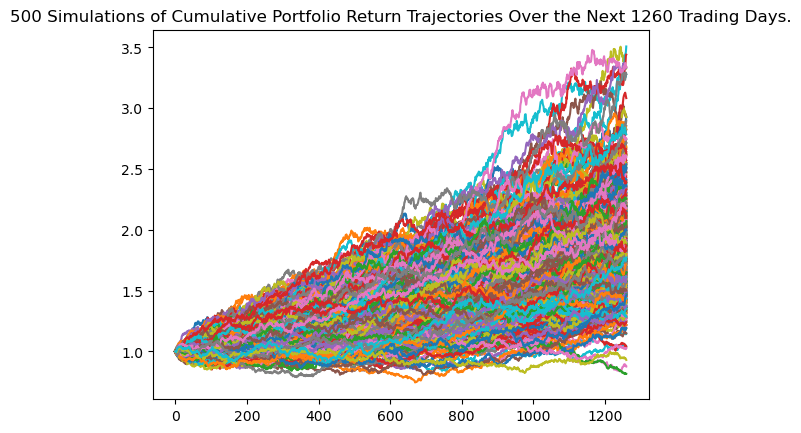

In [361]:
# Plot the simulation outcomes 
MC_sim_line_plot = MC_max_sharpe.plot_simulation()

In [ ]:
# Histogram Plot Distribution
even_weight_distribution_plot = MC_max_sharpe.plot_distribution()

# Visualize the Monte Carlo simulation using a histogram 
even_weight_dist_plot = MC_max_sharpe.plot_distribution()

In [362]:
# Generate summary statistics from the Monte Carlo Simulation
# Set the summary statistics equal to a variable for future use 
MC_summary_statistics = MC_max_sharpe.summarize_cumulative_return()
print(MC_summary_statistics)

count           500.000000
mean              1.876666
std               0.427193
min               0.816683
25%               1.568554
50%               1.838572
75%               2.135252
max               3.507178
95% CI Lower      1.220362
95% CI Upper      2.841556
Name: 1260, dtype: float64


In [363]:
# Using the lower & upper '95%' confidence intervals from the summary statistics
# calculate the range of the probable cumulative returns for a $100,000.00 investment
ci_95_lower_cumulative_return = MC_summary_statistics[8]*100000
ci_95_upper_cumulative_return = MC_summary_statistics[9]*100000

# Print the results 
print(f"There is a 95% chance that an initial investment of $100,000 in the portfolio"
      f" over the next 5 years will end within the range of"
      f" ${ci_95_lower_cumulative_return: ,.2f} and ${ci_95_upper_cumulative_return: ,.2f}.")

There is a 95% chance that an initial investment of $100,000 in the portfolio over the next 5 years will end within the range of $ 122,036.15 and $ 284,155.59.


#### Part 15(b) Minimum Volatility Portfolio

In [364]:
MC_min_volatility = MCSimulation(
    portfolio_data = mc_df,
    weights = [0.0, 0.33517, 0.0, 0.0, 0.0009, 0.0, 0.0, 0.00203, 0.5757, 0.0, 0.0862],
    num_simulation = 500,
    num_trading_days = 252*5
)

# Print the simulation input data 
MC_min_volatility.portfolio_data.head()

XLK                                    \
                            open     high     low  close    volume   
timestamp                                                            
2015-12-01 05:00:00+00:00  44.14  44.3600  44.045  44.35   7779488   
2015-12-02 05:00:00+00:00  44.40  44.5650  44.020  44.08   9697088   
2015-12-03 05:00:00+00:00  44.19  44.3200  43.290  43.50  11854265   
2015-12-04 05:00:00+00:00  43.63  44.6450  43.540  44.57  12840171   
2015-12-07 05:00:00+00:00  44.52  44.5577  44.140  44.35  12814944   

                                                                        XLV  \
                          trade_count       vwap symbol daily_return   open   
timestamp                                                                     
2015-12-01 05:00:00+00:00       25116  44.230051    XLK          NaN  71.48   
2015-12-02 05:00:00+00:00       28153  44.323713    XLK    -0.006088  72.39   
2015-12-03 05:00:00+00:00       33797  43.723955    XLK    -0.013158  71.76   
2015-12-04 05:00:00+00:00       35916  44.328743    XLK     0.024598  70.44   
2015-12-07 05:00:00+00:00       25604  44.332508    XLK    -0.004936  71.63   

                           ...          XLI    XLU                         \
                           ... daily_return   open   high      low  close   
timestamp                  ...                                              
2015-12-01 05:00:00+00:00  ...          NaN  42.92  43.25  42.7500  43.16   
2015-12-02 05:00:00+00:00  ...    -0.010182  42.99  43.10  42.1900  42.20   
2015-12-03 05:00:00+00:00  ...    -0.012491  42.13  42.14  41.7400  41.88   
2015-12-04 05:00:00+00:00  ...     0.014881  42.03  42.53  41.9000  42.47   
2015-12-07 05:00:00+00:00  ...    -0.004949  42.37  42.68  42.1701  42.66   

                                                                                
                             volume trade_count       vwap symbol daily_return  
timestamp                                                                       
2015-12-01 05:00:00+00:00  12551543       44273  43.040413    XLU          NaN  
2015-12-02 05:00:00+00:00  12566056       43285  42.440103    XLU    -0.022243  
2015-12-03 05:00:00+00:00  14879220       60857  41.935748    XLU    -0.007583  
2015-12-04 05:00:00+00:00  10961473       43227  42.383786    XLU     0.014088  
2015-12-07 05:00:00+00:00  13515101       39592  42.524453    XLU     0.004474  

[5 rows x 99 columns]

In [365]:
# Run the Monte Carlo simulation to forecast the five years cumulative returns 
MC_min_volatility.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998118,1.008884,0.992602,1.005792,0.995140,1.015648,1.000040,1.007006,1.001801,0.993728,...,1.000637,1.010072,0.997843,0.985121,1.011601,1.008276,0.997945,1.003463,0.996089,1.006073
2,1.008644,1.017198,0.991739,0.998719,0.994506,1.022815,0.997077,0.997132,0.994570,1.002307,...,1.000004,1.000056,0.999797,0.993919,1.013885,1.006044,1.005130,1.001943,0.993529,1.022828
3,1.014005,1.028773,0.999064,1.003397,0.997875,1.026164,0.985004,0.998237,0.993110,1.001218,...,0.987699,1.007582,1.011230,0.988674,1.023630,1.003213,1.008069,1.005910,1.007782,1.034668
4,1.016443,1.041596,0.990433,1.005608,0.990644,1.025085,0.984352,0.994158,0.984159,1.001165,...,0.993415,1.004978,1.014223,0.983391,1.028727,0.998160,1.007505,1.013599,1.004108,1.045230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,2.139399,1.613039,1.578713,2.270717,1.424277,2.159700,1.362235,1.108379,1.449094,2.092927,...,1.191819,1.034487,1.461083,2.400785,1.376114,1.269893,1.320438,2.070539,1.803854,1.893529
1257,2.109726,1.620669,1.559410,2.234271,1.426061,2.170339,1.371166,1.118210,1.456177,2.102062,...,1.205855,1.027128,1.467728,2.401011,1.368582,1.254303,1.320906,2.078586,1.795527,1.898627
1258,2.122932,1.620132,1.564353,2.233012,1.409649,2.172496,1.383007,1.113847,1.442919,2.085146,...,1.195169,1.016684,1.474826,2.393589,1.359113,1.251072,1.326065,2.053997,1.781688,1.922518
1259,2.112375,1.622272,1.567005,2.212327,1.403760,2.177857,1.389631,1.104145,1.443763,2.062800,...,1.184678,1.012911,1.494203,2.361527,1.367715,1.251945,1.319278,2.048504,1.800334,1.896891


In [ ]:
# Plot the simulation outcomes 
MC_min_line_plot = MC_min_volatility.plot_simulation()

In [ ]:
# Visualize the Monte Carlo simulation by creating a histogram
even_weight_distribution_plot = MC_min_volatility.plot_distribution()

In [ ]:
# Generate summary statistics from the Monte Carlo Simulation
# Set the summary statistics equal to a variable for future use 
MC__min_summary_statistics = MC_min_volatility.summarize_cumulative_return()
print(MC__min_summary_statistics)

In [ ]:
# Using the lower & upper '95%' confidence intervals from the summary statistics
# calculate the range of the probable cumulative returns for a $100,000.00 investment
ci_95_lower_cumulative_return_min = MC__min_summary_statistics[8]*100000
ci_95_upper_cumulative_return_min = MC__min_summary_statistics[9]*100000

# Print the results 
print(f"There is a 95% chance that an initial investment of $100,000 in the portfolio"
      f" over the next 5 years will end within the range of"
      f" ${ci_95_lower_cumulative_return_min: ,.2f} and ${ci_95_upper_cumulative_return_min: ,.2f}.")